In [1]:
import numpy as np
import matplotlib.pyplot as plt
from typing import Type, Dict, Any, Callable
from math import sqrt,pi,e
from scipy.integrate import quad
import seaborn as sns
%matplotlib inline

def exp(lamda, size):
    return np.random.exponential(1/lamda, size)

def poisson(p, size):
    return np.random.poisson(p, size)

def gaussian(miu, sigma, size):
    return np.random.normal(miu,sigma, size)

def uniform(low, high, size):
    return np.random.uniform(low, high, size)

def binomial(p, n, size):
    return np.random.binomial(n, p, size)

def xsum_P(array, avr, var, x:float):
    """
    Parameters:
        array: np.array, size: times * n 
        x: parameter x
    """
    times, n = array.shape
    sum = np.sum(array, axis=1)
    sum = (sum - n * avr) / sqrt(n * var)
    
    num = 0
    for arr in sum:
        if arr <= x:
            num += 1
    return num / times
    
def x_sum_normalized(array, avr, var):
    times, n = array.shape
    sum = np.sum(array, axis=1)
    sum = (sum - n * avr) / sqrt(n * var)
    return sum
    
def x_sum(array):
    sum = np.sum(array, axis=1)
    return sum
'''
def calculus(f, low, high):
    DELTA_X=1e-7
    tmp = low
    sum = 0
    while(tmp <= high):
        sum += f(tmp) * DELTA_X
        tmp += DELTA_X
    return sum
'''
def gaussian_normal(x):
        return 1/sqrt(2*pi)*e**(-0.5*x*x)
    
def gaussian_normal_calculus(low, high):
    def gaussian_normal(x):
        return 1/sqrt(2*pi)*e**(-0.5*x*x)
    return quad(gaussian_normal, low, high)

def find_p(array, x):
    """
    returns the p that array < x
    """
    num = len(array)
    sum=0
    for i in array:
        if i <= x:
            sum += 1
            
    return sum/num

In [ ]:
arr = np.random.poisson(1,(10,2))
print(arr)
sum = np.sum(arr,axis=1)
print(sum)

In [ ]:
# poisson
array = poisson(2, (10000, 7))
array = x_sum_normalized(array, 2, 2)
sns.histplot(array, bins=100, kde=True, stat="density", color='blue', edgecolor='black')
plt.title("Poisson Distribution, n=100")
plt.xlabel("Value")
plt.ylabel("Density")
plt.show()

In [ ]:
# poisson
array = poisson(2, (10000, 100))
array = x_sum_normalized(array, 2, 2)

p1 = find_p(array,1)
p2 = gaussian_normal_calculus(-np.inf, 1)
print(p1)
print(p2[0])



In [ ]:
# exp
array = exp(1, (10000, 100))
array = x_sum_normalized(array, 1, 1)
sns.histplot(array, bins=30, kde=True, stat="density", color='blue', edgecolor='black')
plt.title("Exponential Distribution, n=100")
plt.xlabel("Value")
plt.ylabel("Density")
plt.show()

In [ ]:
# exp
array = exp(1, (10000, 100))
array = x_sum_normalized(array, 1, 1)
p1 = find_p(array,1)
p2 = gaussian_normal_calculus(-np.inf, 1)
print(p1)
print(p2[0])

In [ ]:
# uniform
array = uniform(1,3,(10000,100))
array = x_sum_normalized(array, 2, 1/3)
sns.histplot(array, bins=30, kde=True, stat="density", color='blue', edgecolor='black')
plt.title("Uniform Distribution, n=100")
plt.xlabel("Value")
plt.ylabel("Density")
plt.show()

In [ ]:
# uniform
array = uniform(1,3,(10000,100))
array = x_sum_normalized(array, 2, 1/3)

p1 = find_p(array,1)
p2 = gaussian_normal_calculus(-np.inf, 1)
print(p1)
print(p2[0])

In [ ]:
# Binomial
array = binomial(0.3, 100, (10000, 1000))
array = x_sum_normalized(array, 30, 21)
sns.histplot(array, bins=30, kde=True, stat="density", color='blue', edgecolor='black')
plt.title("Binomial Distribution, n=100")
plt.xlabel("Value")
plt.ylabel("Density")
plt.show()

In [ ]:
# Binomial
array = binomial(0.3, 100, (10000, 100))
array = x_sum_normalized(array, 30, 21)


p1 = find_p(array,1)
p2 = gaussian_normal_calculus(-np.inf, -1)
print(p1)
print(p2[0])

In [ ]:
array = binomial(0.5, 10, (1,1000000))
array = array[0]
#array = (array-5)/2.5
sns.histplot(array, bins=100, kde=False, stat="density", color='blue', edgecolor='black')
plt.title("Binomial Distribution (n=10, p=0.5, n*p=5)")
plt.xlabel("Value")
plt.ylabel("Density")
plt.show()

In [ ]:
array = binomial(0.5, 50, (1,1000000))
array = array[0]
sns.histplot(array, bins=100, kde=False, stat="density", color='blue', edgecolor='black')
plt.title("Binomial Distribution (n=50, p=0.5, n*p=25)")
plt.xlabel("Value")
plt.ylabel("Density")
plt.show()

In [ ]:
array = binomial(0.5, 10000, (1,1000000))
array = array[0]
sns.histplot(array, bins=500, kde=False, stat="density", color='blue', edgecolor='black')
plt.title("Binomial Distribution (n=10000, p=0.5, n*p=5000)")
plt.xlabel("Value")
plt.ylabel("Density")
plt.show()

In [ ]:
# Binomial
array = binomial(0.5, 10000, (1,10000))
array = (array-5000)/sqrt(2500)


p1 = find_p(array[0],2)
p2 = gaussian_normal_calculus(-np.inf, 2)
print(p1)
print(p2[0])

画 $X_1 + X_2 + ... + X_n$ 的密度函数曲线

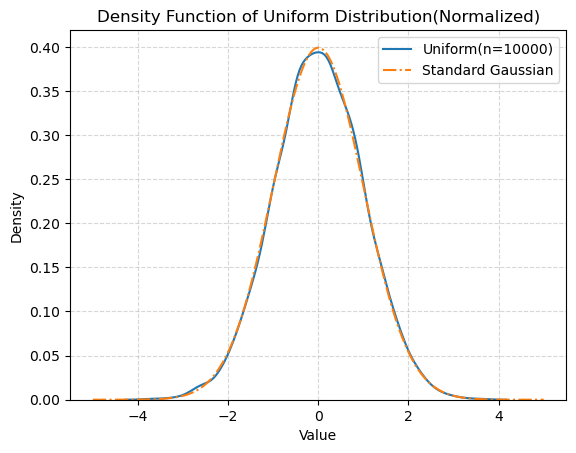

In [32]:
bio_array10000 = binomial(0.5, 10000, (10000,10000))
bio_array10000 = x_sum_normalized(bio_array10000, 5000, 2500)
poisson_arr10000 = poisson(3, (10000, 10000))
poisson_arr10000 = x_sum_normalized(poisson_arr10000, 3, 3)
bio_array50 = binomial(0.5, 10000, (30, 1000))
bio_array50 = x_sum_normalized(bio_array50, 5000, 2500)
poisson_arr50 = poisson(3, (10, 1000))
poisson_arr50 = x_sum_normalized(poisson_arr50, 3, 3)
uni = uniform(1,3,(10000,10000))
uni = x_sum_normalized(uni, 2, 1/3)
array = exp(1, (10000, 10000))
array = x_sum_normalized(array, 1, 1)

standard_guassian_x = np.linspace(-5, 5, 500000)  # 在区间 [-2, 5] 上生成 500 个点
standard_guassian_y = gaussian_normal(standard_guassian_x)

#sns.kdeplot(bio_array10000, linewidth=1.5, label="Binomial (n=10000)")
#sns.kdeplot(poisson_arr10000, linewidth=1.5, label="Poisson(n=10000)")
sns.kdeplot(uni, linewidth=1.5, label="Uniform(n=10000)",)
#sns.kdeplot(array, linewidth=1.5, label="Exponential(n=10000)")
plt.plot(standard_guassian_x,standard_guassian_y, linewidth=1.5, label="Standard Gaussian", linestyle='-.')
plt.title("Density Function of Uniform Distribution(Normalized)")
plt.xlabel("Value")
plt.ylabel("Density")
plt.legend()
plt.grid(linestyle='--', alpha=0.5)
plt.show()

In [ ]:
def L2_distance(f, g):
    def h(x):
        return abs(f(x) - g(x))
    return quad(h, -np.inf, np.inf)

In [ ]:
from tqdm import tqdm
from matplotlib.ticker import MultipleLocator
def get_loss_binomial(n, x=0):
    """
    Parameters:
    n: the number of X
    x: P(X<x)
    """
    
    #array = binomial(0.5, 100, (100000,n)) #搭配n=500，效果非常好
    #print(array.shape)
    array = binomial(0.5, 100, (50000,n)) #(50000,500效果也不错)
    array = x_sum_normalized(array, 50, 25)
    
    #print(array.shape)
    p1 = find_p(array,x)
    p2 = gaussian_normal_calculus(-np.inf, x)
    p2 = p2[0]
    
    return abs(p1-p2)/p2

loss_array = np.zeros(500)
#x_axis = range(1, 10)
for i in tqdm(range(len(loss_array)), desc="Calculating loss"):
    loss_array[i] = get_loss_binomial(i+1)
    
#get_loss_binomial(10)

#print(loss_array)
plt.figure(dpi=800)
plt.plot(loss_array, linewidth=0.5)
plt.tick_params(axis='both', labelsize=4) 
plt.xlabel("n")
plt.ylabel("loss")
plt.axhline(y=0.001, color='r', linestyle='--',linewidth=0.7)
plt.axhline(y=0.01, color='yellow', linestyle='--',linewidth=0.7)
ax = plt.gca()  # 获取当前坐标轴
ax.yaxis.set_major_locator(MultipleLocator(0.002))  # 每隔 0.5 显示一个刻度
ax.yaxis.set_minor_locator(MultipleLocator(1))  # 添加更细的次级刻度

# 添加网格
ax.grid(which='major', color='gray', linestyle='--', linewidth=0.3)  # 主网格
ax.grid(which='minor', color='lightgray', linestyle=':', linewidth=0.2)  # 次网格
plt.title("Loss of Binomial Distribution")
#plt.legend()

#sns.histplot(loss_array, bins=500, kde=True, stat="density", color='blue', edgecolor='black')

plt.show()

In [ ]:
from tqdm import tqdm
from matplotlib.ticker import MultipleLocator
def get_loss_poisson(n, x=0):
    """
    Parameters:
    n: the number of X
    x: P(X<x)
    """
    
    #array = binomial(0.5, 100, (100000,n)) #搭配n=500，效果非常好
    #print(array.shape)
    array = poisson(2, (50000, n))
    array = x_sum_normalized(array, 2, 2)
        
    #print(array.shape)
    p1 = find_p(array,x)
    p2 = gaussian_normal_calculus(-np.inf, x)
    p2 = p2[0]
    
    return abs(p1-p2)/p2

loss_array = np.zeros(500)
#x_axis = range(1, 10)
for i in tqdm(range(len(loss_array)), desc="Calculating loss"):
    loss_array[i] = get_loss_binomial(i+1)
    
#get_loss_binomial(10)

#print(loss_array)
plt.figure(dpi=800)
plt.plot(loss_array, linewidth=0.5)
plt.tick_params(axis='both', labelsize=4) 
plt.xlabel("n")
plt.ylabel("loss")
plt.axhline(y=0.001, color='r', linestyle='--',linewidth=0.7)
plt.axhline(y=0.01, color='yellow', linestyle='--',linewidth=0.7)
ax = plt.gca()  # 获取当前坐标轴
ax.yaxis.set_major_locator(MultipleLocator(0.002))  # 每隔 0.5 显示一个刻度
ax.yaxis.set_minor_locator(MultipleLocator(1))  # 添加更细的次级刻度

# 添加网格
ax.grid(which='major', color='gray', linestyle='--', linewidth=0.3)  # 主网格
ax.grid(which='minor', color='lightgray', linestyle=':', linewidth=0.2)  # 次网格
plt.title("Loss of Poisson Distribution")
#plt.legend()

#sns.histplot(loss_array, bins=500, kde=True, stat="density", color='blue', edgecolor='black')

plt.show()
    


In [ ]:
from tqdm import tqdm
from matplotlib.ticker import MultipleLocator
def get_loss_uniform(n, x=0):
    """
    Parameters:
    n: the number of X
    x: P(X<x)
    """
    
    #array = binomial(0.5, 100, (100000,n)) #搭配n=500，效果非常好
    #print(array.shape)
    array = uniform(1,3,(50000,n))
    array = x_sum_normalized(array, 2, 1/3)
        
    #print(array.shape)
    p1 = find_p(array,x)
    p2 = gaussian_normal_calculus(-np.inf, x)
    p2 = p2[0]
    
    return abs(p1-p2)/p2

loss_array = np.zeros(500)
#x_axis = range(1, 10)
for i in tqdm(range(len(loss_array)), desc="Calculating loss"):
    loss_array[i] = get_loss_binomial(i+1)
    
#get_loss_binomial(10)

#print(loss_array)
plt.figure(dpi=800)
plt.plot(loss_array, linewidth=0.5)
plt.tick_params(axis='both', labelsize=4) 
plt.xlabel("n")
plt.ylabel("loss")
plt.axhline(y=0.001, color='r', linestyle='--',linewidth=0.7)
plt.axhline(y=0.01, color='yellow', linestyle='--',linewidth=0.7)
ax = plt.gca()  # 获取当前坐标轴
ax.yaxis.set_major_locator(MultipleLocator(0.002))  # 每隔 0.5 显示一个刻度
ax.yaxis.set_minor_locator(MultipleLocator(1))  # 添加更细的次级刻度

# 添加网格
ax.grid(which='major', color='gray', linestyle='--', linewidth=0.3)  # 主网格
ax.grid(which='minor', color='lightgray', linestyle=':', linewidth=0.2)  # 次网格
plt.title("Loss of Uniform Distribution")
#plt.legend()

#sns.histplot(loss_array, bins=500, kde=True, stat="density", color='blue', edgecolor='black')

plt.show()
    


In [ ]:
from tqdm import tqdm
from matplotlib.ticker import MultipleLocator
def get_loss_exp(n, x=0):
    """
    Parameters:
    n: the number of X
    x: P(X<x)
    """
    
    #array = binomial(0.5, 100, (100000,n)) #搭配n=500，效果非常好
    #print(array.shape)
    array = exp(1, (50000, n))
    array = x_sum_normalized(array, 1, 1)
        
    #print(array.shape)
    p1 = find_p(array,x)
    p2 = gaussian_normal_calculus(-np.inf, x)
    p2 = p2[0]
    
    return abs(p1-p2)/p2

loss_array = np.zeros(500)
#x_axis = range(1, 10)
for i in tqdm(range(len(loss_array)), desc="Calculating loss"):
    loss_array[i] = get_loss_binomial(i+1)
    
#get_loss_binomial(10)

#print(loss_array)
plt.figure(dpi=800)
plt.plot(loss_array, linewidth=0.5)
plt.tick_params(axis='both', labelsize=4) 
plt.xlabel("n")
plt.ylabel("loss")
plt.axhline(y=0.001, color='r', linestyle='--',linewidth=0.7)
plt.axhline(y=0.01, color='yellow', linestyle='--',linewidth=0.7)
ax = plt.gca()  # 获取当前坐标轴
ax.yaxis.set_major_locator(MultipleLocator(0.002))  # 每隔 0.5 显示一个刻度
ax.yaxis.set_minor_locator(MultipleLocator(1))  # 添加更细的次级刻度

# 添加网格
ax.grid(which='major', color='gray', linestyle='--', linewidth=0.3)  # 主网格
ax.grid(which='minor', color='lightgray', linestyle=':', linewidth=0.2)  # 次网格
plt.title("Loss of Exp Distribution")
#plt.legend()

#sns.histplot(loss_array, bins=500, kde=True, stat="density", color='blue', edgecolor='black')

plt.show()
    


In [ ]:
from tqdm import tqdm
from matplotlib.ticker import MultipleLocator
def get_loss_exp(n, x=0):
    """
    Parameters:
    n: the number of X
    x: P(X<x)
    """
    
    #array = binomial(0.5, 100, (100000,n)) #搭配n=500，效果非常好
    #print(array.shape)
    array = gaussian(0,1,(50000,n))
    array = x_sum_normalized(array, 0, 1)
        
    #print(array.shape)
    p1 = find_p(array,x)
    p2 = gaussian_normal_calculus(-np.inf, x)
    p2 = p2[0]
    
    return abs(p1-p2)/p2

loss_array = np.zeros(500)
#x_axis = range(1, 10)
for i in tqdm(range(len(loss_array)), desc="Calculating loss"):
    loss_array[i] = get_loss_binomial(i+1)
    
#get_loss_binomial(10)

#print(loss_array)
plt.figure(dpi=800)
plt.plot(loss_array, linewidth=0.5)
plt.tick_params(axis='both', labelsize=4) 
plt.xlabel("n")
plt.ylabel("loss")
plt.axhline(y=0.001, color='r', linestyle='--',linewidth=0.7)
plt.axhline(y=0.01, color='yellow', linestyle='--',linewidth=0.7)
ax = plt.gca()  # 获取当前坐标轴
ax.yaxis.set_major_locator(MultipleLocator(0.002))  # 每隔 0.5 显示一个刻度
ax.yaxis.set_minor_locator(MultipleLocator(1))  # 添加更细的次级刻度

# 添加网格
ax.grid(which='major', color='gray', linestyle='--', linewidth=0.3)  # 主网格
ax.grid(which='minor', color='lightgray', linestyle=':', linewidth=0.2)  # 次网格
plt.title("Loss of Gaussian Distribution")
#plt.legend()

#sns.histplot(loss_array, bins=500, kde=True, stat="density", color='blue', edgecolor='black')

plt.show()
    


In [4]:
from math import e
import math
def get_p_poisson(lamda, k):
    """return the sum of p that less than k"""
    sum=0
    assert(k>=0)
    for x in range(0, k+1):
        sum+=e**(-lamda)*(lamda**x)/math.factorial(x)
    return sum

def get_p_bio(p, n, k):
    """return the sum of p that less than k"""
    sum=0
    assert(k>=0)
    for x in range(0,k+1):
        sum+=math.factorial(n)/math.factorial(n-x)/math.factorial(x)*(p**x)*((1-p)**(n-x))
    return sum
    
#get_p_poisson(1,0)
get_p_bio(0.5, 40, 20)

0.5626853438097896

In [ ]:
def get_loss_bino_poisson0(n):
    p=0.1
    #array = binomial(p, n, (1,10000))
        #print(array.shape)
    #array = array[0]
    #print(array)
    loss=0
    for x in range(0, n+1):
        loss+=abs(get_p_bio(p,n,x)-get_p_poisson(p*n,x))/get_p_poisson(p*n,x)
    return loss/n


array = np.zeros(30)
for idx in range(len(array)):
    array[idx] = get_loss_bino_poisson0(idx+1)
    
plt.figure(dpi=200)
plt.plot(array, linewidth=1)
plt.xlabel("n")
plt.ylabel("loss")
plt.title("Binomial & Poisson (p=0.1, n_max=30)")
plt.show()

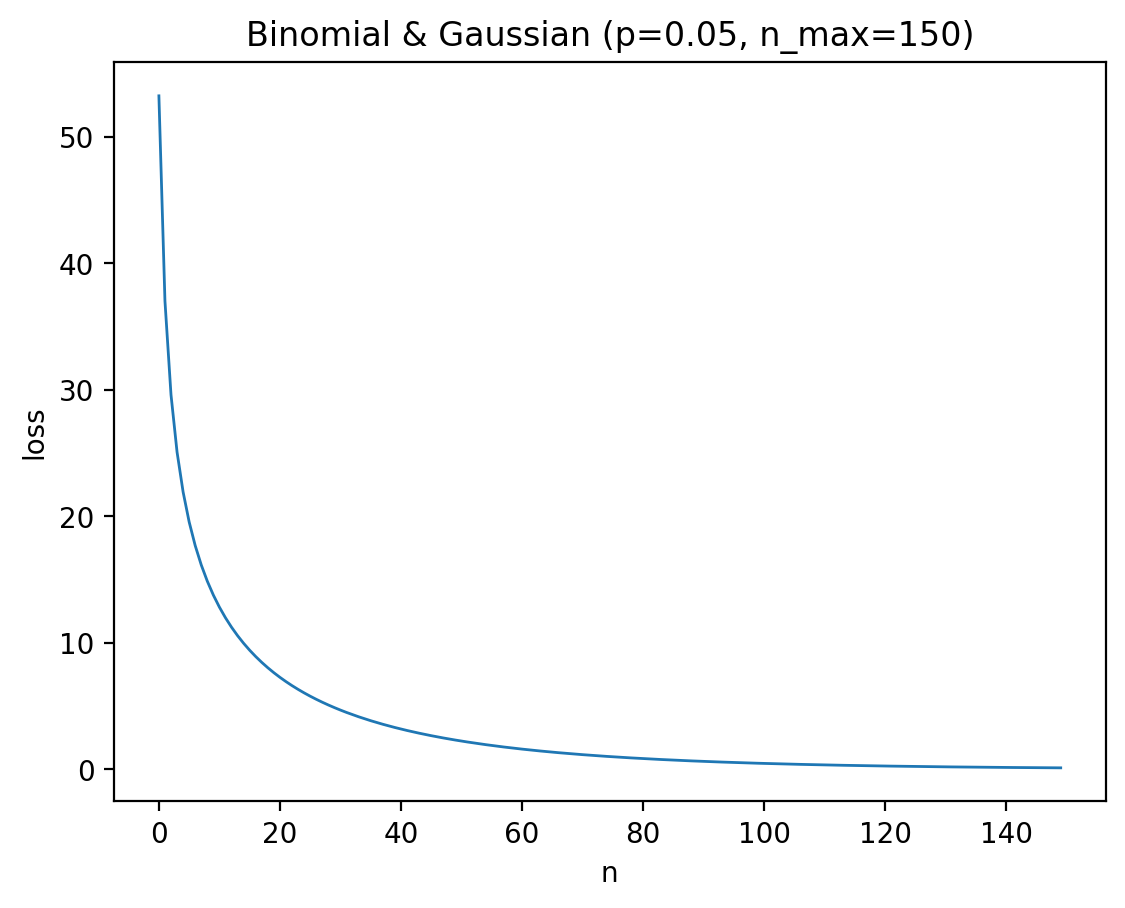

In [20]:
from math import pi
def gaussian_calculus(miu, sigma, x):
    def gaussian(x):
        return (1/sqrt(2*pi)/sigma)*e**((-0.5*(x-miu)**2)/sigma/sigma)
    return quad(gaussian, -0.01, x)[0]


def get_loss_bino_poisson(n):
    p=0.05
    #array = binomial(p, n, (1,10000))
        #print(array.shape)
    #array = array[0]
    #print(array)
    loss=0
    for x in range(0, n+1):
        loss+=abs(get_p_bio(p,n,x)-gaussian_calculus(n*p, (n*p*(1-p))**0.5,x))/gaussian_calculus(n*p, (n*p*(1-p))**0.5,x)
    return loss/n


array = np.zeros(150)
for idx in range(len(array)):
    array[idx] = get_loss_bino_poisson(idx+1)
    
plt.figure(dpi=200)
plt.plot(array, linewidth=1)
plt.xlabel("n")
plt.ylabel("loss")
plt.title("Binomial & Gaussian (p=0.05, n_max=150)")
plt.show()

In [ ]:
array = binomial(0.3, 100, (10000, 1000))
array = x_sum_normalized(array, 30, 21)

In [ ]:
gaussian_normal_calculus(-np.inf,0)